<a href="https://colab.research.google.com/github/ljabbie/lj/blob/main/Prob3c_and_4_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##3c.

Creating a plot of catalyst weight as a function of ΘB (ranging from 2 to 20) for a constant 
conversion of 90%

In [12]:
import numpy as np   #Importing a library
from scipy.integrate import odeint
from matplotlib import pyplot as plt
plt.rcParams.update({'font.size': 22})

In [13]:
def odes_solve(w, theta):
    dxdw= (k * CA0 * ((1.-x)*(1-alpha*w)**.5)*(theta-x)*(1-alpha*w)**.5 )/ nu0 # define dX/dW
   
    return dxdw

In [14]:
x=.9    #Constant conversion
nu0 = 10    # volumetric flow rate m^3/h
alpha = 0.146 # alpha parameter 1/kg
CA0 = 200     # initial concentration mol/m^3 
k = .130   

theta = np.linspace(2, 20)

In [15]:
w=odeint(odes_solve, 0, theta)

##Plotting

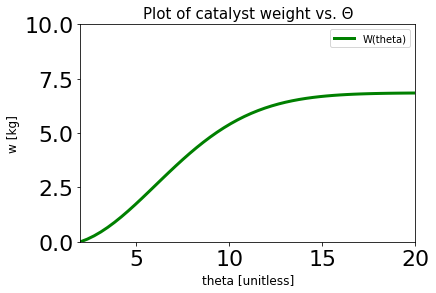

In [16]:
plt.plot(theta, w, '-g', linewidth = 3, label= "W(theta)")
plt.legend(fontsize=10)
plt.title('Plot of catalyst weight vs. Θ',fontsize=15)
plt.xlabel("theta [unitless]", fontsize=12)
plt.ylabel(r"w [kg]",fontsize=12)
plt.xlim([2,20])
plt.ylim([0,10])
plt.show()

##Problem 4.

#A.

**Goal**: 
i) Plot the experimental data 
along with analytical curves for X vs. Da for a varying number of reactors (between 1 and 10).
ii) Which number of reactors best matches the experimental data?

**Assumption**: 1st rxn.

**Given**: A ==> B is a liquid-phase, irreversible chemical reaction in series CSTRS

Given data and conversion equations for different ns.

In [17]:
Da=np.array([0, 0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8, 2])  #Damköhler number
X_4 = [0, 0.518, 0.740, 0.847, 0.905, 0.938, 0.957, 0.970, 0.978, 0.984, 0.988]
XDA1 =np.array(1-(1./((1+Da)**1)))
XDA2 =np.array(1-(1./((1+Da)**2)))
XDA3 =np.array(1-(1./((1+Da)**3)))
XDA4 =np.array(1-(1./((1+Da)**4)))
XDA5 =np.array(1-(1./((1+Da)**5)))
XDA6 =np.array(1-(1./((1+Da)**6)))
XDA7 =np.array(1-(1./((1+Da)**7)))
XDA8 =np.array(1-(1./((1+Da)**8)))
XDA9 =np.array(1-(1./((1+Da)**9)))
XDA10 =np.array(1-(1./((1+Da)**10)))

print(XDA5-X_4)             # Verifying n that matches data.       
print(XDA3-X_4)


[0.         0.08012243 0.07406557 0.05763257 0.04207785 0.03075
 0.02359621 0.01744133 0.01358347 0.01018955 0.00788477]
[ 0.         -0.0967037  -0.10443149 -0.09114062 -0.07646776 -0.063
 -0.05091435 -0.04233796 -0.03489577 -0.02955394 -0.02503704]


__Plotting__

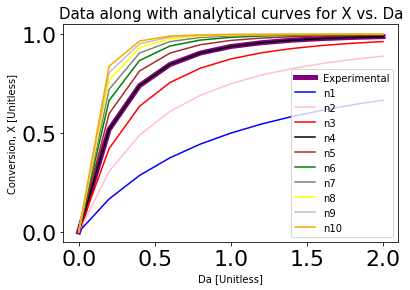

In [18]:
plt.plot(Da, X_4, color='purple', linewidth = 5, label='Experimental')
plt.plot(Da, XDA1, color='blue', label='n1')
plt.plot(Da, XDA2, color='pink', label='n2')
plt.plot(Da, XDA3, color='red', label='n3')
plt.plot(Da, XDA4, color='black', label='n4')
plt.plot(Da, XDA5, color='brown', label='n5')
plt.plot(Da, XDA6, color='green', label='n6')
plt.plot(Da, XDA7, color='grey', label='n7')
plt.plot(Da, XDA8, color='yellow', label='n8')
plt.plot(Da, XDA9, color='silver', label='n9')
plt.plot(Da, XDA10, color='orange', label='n10')

# Formatting
plt.title("Data along with analytical curves for X vs. Da", fontsize=15)  
plt.ylabel("Conversion, X [Unitless]", fontsize=10)
plt.xlabel("Da [Unitless]", fontsize=10)

plt.legend(fontsize=10) 


Looking at the plot and the verification code line above, the number of reactors that matches the experimental data is **5**

#B

The conversion achieved using 5 reactors.

In [19]:
k = 0.00398 # [hr^-1] At T = 450
Ea= 7     #kcal/mol
V = 4500   #L (vol.of each CSRT)
C_A0 = 1.8   # mol/L
Vo = 20   #L/hr
T = 450   # K
Tau = V/Vo
X_achieved = (1-(1/((1+Tau*k)**5)))

print(X_achieved)

0.9591322191180294


Therefore, **X_achieved = 0.959**